## Shubham Shekhar Jha (sxj220028)
### CS6320 - NLP
### HW3

Read the dataset: [Tweet text classification dataset](https://www.kaggle.com/datasets/pradeeptrical/text-tweet-classification).

Show distribution of target classes.

Divide dataset in train and test in 80:20 ratio. 

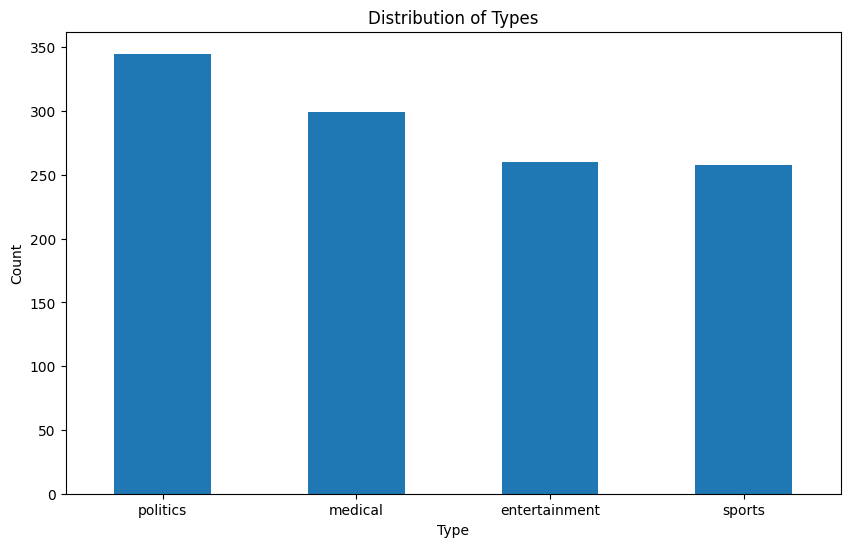

0       @ACNI2012 @TheToka920 Never knew having 1 or 2...
1       MYCA Magical Moments:\n\nSeptember, 2011: Sham...
2       The current state of last year's @BBL finalist...
3              @HOLLYJISOO Why did you bring a cricket...
4       Babar Azam only Pakistani included in the ICC ...
                              ...                        
1157    The senior is one of the most decorated male t...
1158    2020 COULD be your year to get moving and chan...
1159    RT @MailSport: 'I thought you liked yellow on ...
1160    RT @BBCSport: ❤️ \n\nTennis greats played toge...
1161    RT @MattRacquet: A thread on hard court slidin...
Name: text, Length: 1162, dtype: object


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read CSV file
data = pd.read_excel("tweet_text_classification_dataset.xlsx", header=0)

# Create a graph showing the distribution of the target classes
type_counts = data["type"].value_counts()
plt.figure(figsize=(10, 6))
type_counts.plot(kind="bar")
plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Distribution of Types")
plt.xticks(rotation=0)
plt.show()

# Replace Links with "link"
data["text"] = data["text"].replace("http\S+", "link", regex=True)

# Split the dataset into features (X) and target variable (y)
X = data["text"]
y = data["type"]

print(data["text"])

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

### The model should be able to predict the type of tweet from sports, politics, medical and entertainment.

In [25]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = list(stopwords.words("english"))
vectorizer = TfidfVectorizer(stop_words=stopwords)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### Trying Naive Bayes to classify the tweets 

               precision    recall  f1-score   support

entertainment       0.91      0.78      0.84        54
      medical       0.87      0.72      0.79        54
     politics       0.62      0.90      0.73        68
       sports       0.95      0.74      0.83        57

     accuracy                           0.79       233
    macro avg       0.84      0.78      0.80       233
 weighted avg       0.83      0.79      0.80       233


accuracy score:  0.7896995708154506

precision score:  0.8276393534224153

recall score:  0.7896995708154506

f1 score:  0.7952244581715529


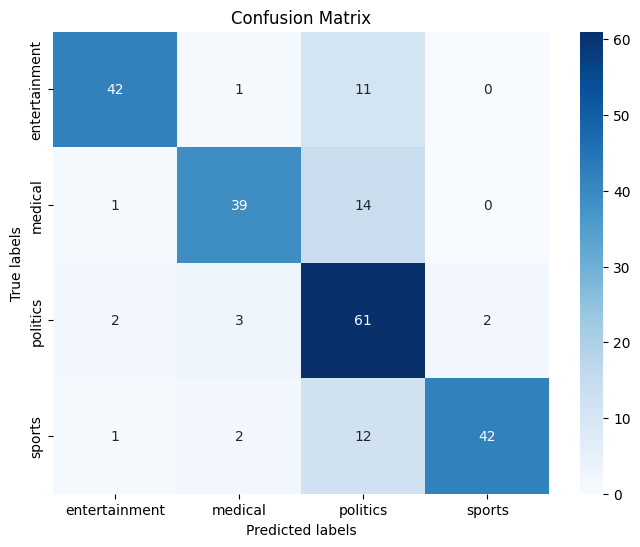

In [26]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# make predictions on the test data
pred = naive_bayes.predict(X_test)

# Print Metrics(Need to handle multi class), Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("\naccuracy score: ", accuracy_score(y_test, pred))
print("\nprecision score: ", precision_score(y_test, pred, average="weighted"))
print("\nrecall score: ", recall_score(y_test, pred, average="weighted"))
print("\nf1 score: ", f1_score(y_test, pred, average="weighted"))

# Create a heatmap for the confustion matrix
labels = ["entertainment", "medical", "politics", "sports"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

#### Trying Logistic Regression to classify the tweets 

               precision    recall  f1-score   support

entertainment       0.85      0.87      0.86        54
      medical       1.00      0.70      0.83        54
     politics       0.70      0.93      0.80        68
       sports       0.98      0.86      0.92        57

     accuracy                           0.85       233
    macro avg       0.88      0.84      0.85       233
 weighted avg       0.87      0.85      0.85       233


accuracy score:  0.8454935622317596

precision score:  0.873843152555599

recall score:  0.8454935622317596

f1 score:  0.8481157020151279


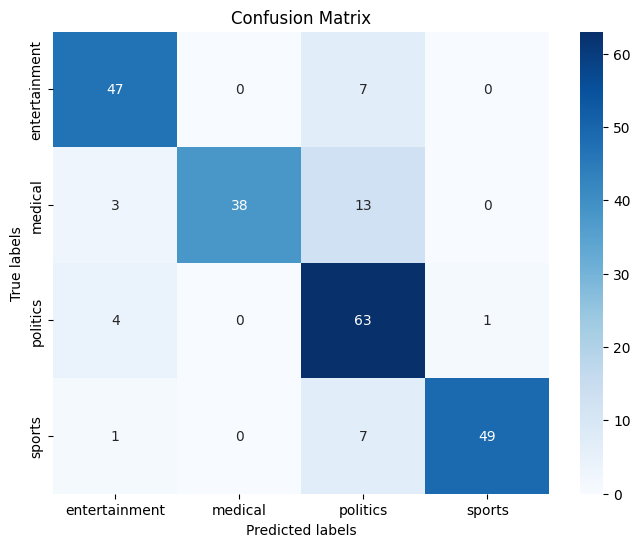

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

lr_clsfr = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", class_weight="balanced"
)

lr_clsfr.fit(X_train, y_train)

# make predictions on the test data
pred = lr_clsfr.predict(X_test)

# Print Metrics(Need to handle multi class), Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("\naccuracy score: ", accuracy_score(y_test, pred))
print("\nprecision score: ", precision_score(y_test, pred, average="weighted"))
print("\nrecall score: ", recall_score(y_test, pred, average="weighted"))
print("\nf1 score: ", f1_score(y_test, pred, average="weighted"))

# Create a heatmap for the confustion matrix
labels = ["entertainment", "medical", "politics", "sports"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

#### Trying Neural Networks to classify the tweets 

               precision    recall  f1-score   support

entertainment       0.88      0.83      0.86        54
      medical       0.97      0.67      0.79        54
     politics       0.65      0.94      0.77        68
       sports       1.00      0.82      0.90        57

     accuracy                           0.82       233
    macro avg       0.88      0.82      0.83       233
 weighted avg       0.87      0.82      0.83       233


accuracy score:  0.8240343347639485

precision score:  0.8652178653621291

recall score:  0.8240343347639485

f1 score:  0.8281714794848877


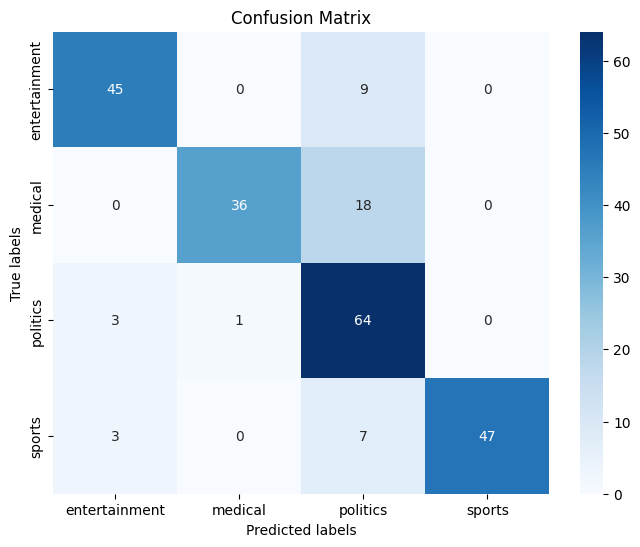

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

nn_clsfr = MLPClassifier(
    solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(16, 9), random_state=1
)

nn_clsfr.fit(X_train, y_train)

# make predictions on the test data
pred = nn_clsfr.predict(X_test)

# Print Metrics(Need to handle multi class), Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, pred)
print(classification_report(y_test, pred))
print("\naccuracy score: ", accuracy_score(y_test, pred))
print("\nprecision score: ", precision_score(y_test, pred, average="weighted"))
print("\nrecall score: ", recall_score(y_test, pred, average="weighted"))
print("\nf1 score: ", f1_score(y_test, pred, average="weighted"))

# Create a heatmap for the confustion matrix
labels = ["entertainment", "medical", "politics", "sports"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## Analysis

Firstly, I had to use Multinomial Naive Bayes model because my text classification was a multi-class problem. If we really wanted to use Bernoulli/Binary Multinomial Naive Bayes, we could have used it but it would require some workarounds.
Please note that for **precision**, **recall** and **f1 score** I had to use weighted average of the classes, since the default method(binary) doesnt work for multi-class problems.

Now, let us observe the results of the models. Firstly it is important to note that the dataset size is very small (only around 1100 tweets) so the results differ significantly based on how the data is split. With different runs of the same text classification approaches, we can observe vasstly different results.

### Analysis for the observed results

#### Multinomial Naive Bayes

The Multinomial Naive Bayes model does a good job at classifying sports, entertainment and medical tweets but it performs poorly for political tweets. We will see this as a common trend for all three of the approaches. As the data is pretty small, incorrectly classified examples for the classes are very few, except the political class

#### Logistic Regression

The Logistic Regression model works perfectly for medical class and almost perfectly for the sports class. Again politics class sees the worst performance and entertainment class also a relatively poor performance.

#### Neural Networks

Neural Networks show almost the same results as the Logisitic Regression models with politics class being the worst, entertainment class with a poor performance and the other 2 classes being near perfect. I have noticed that the initial randomization of weights can drastically impact the final classification results.
